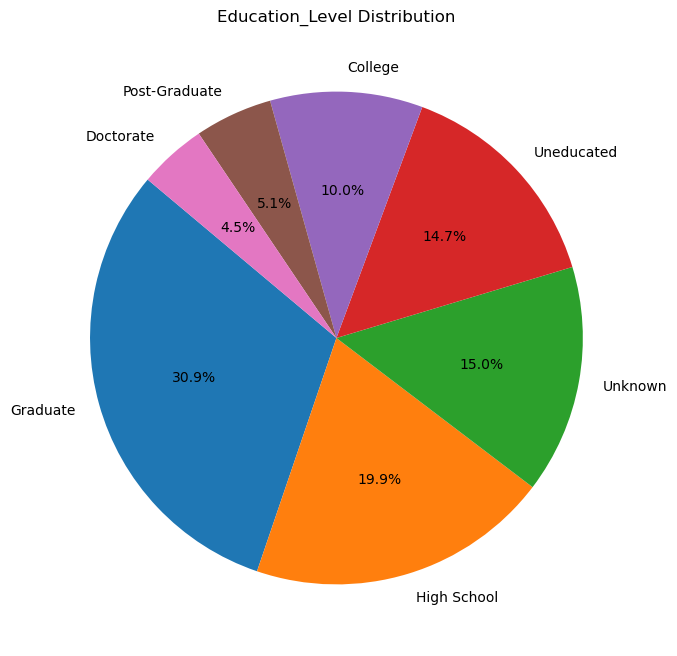

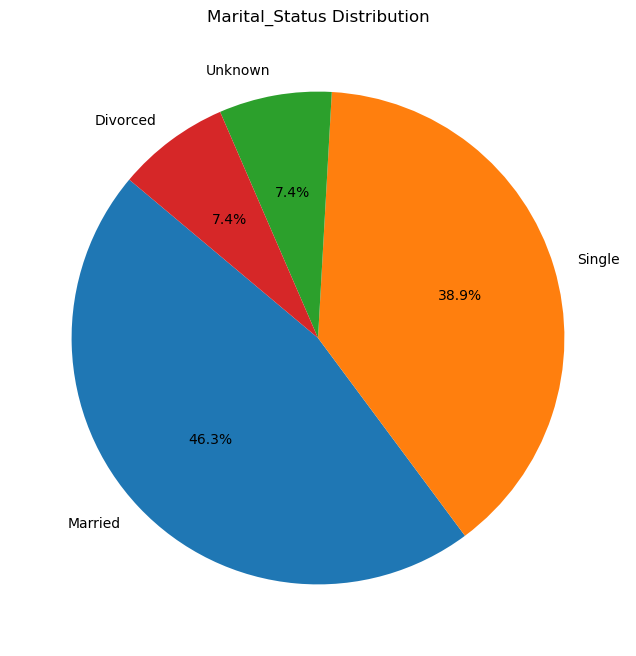

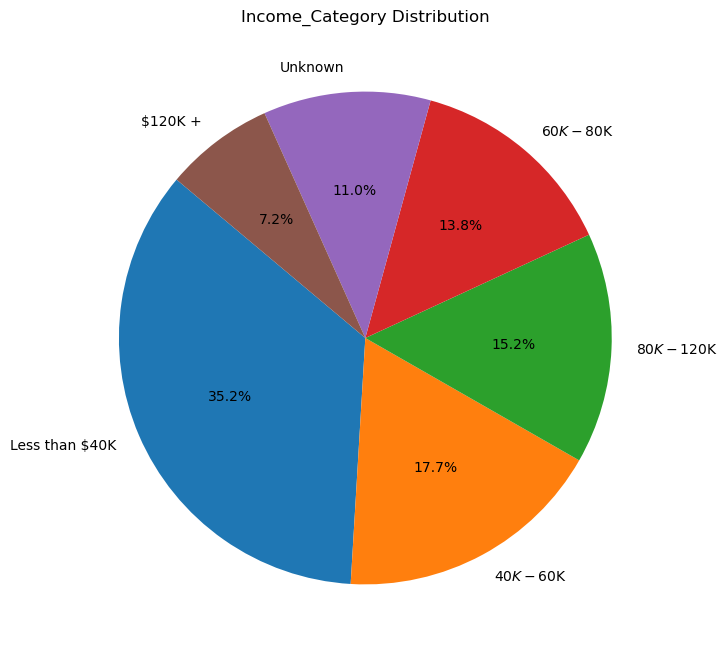

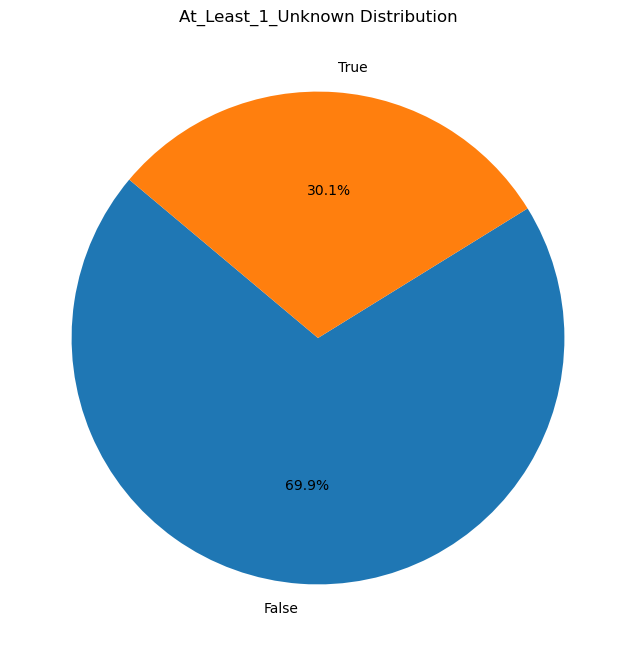

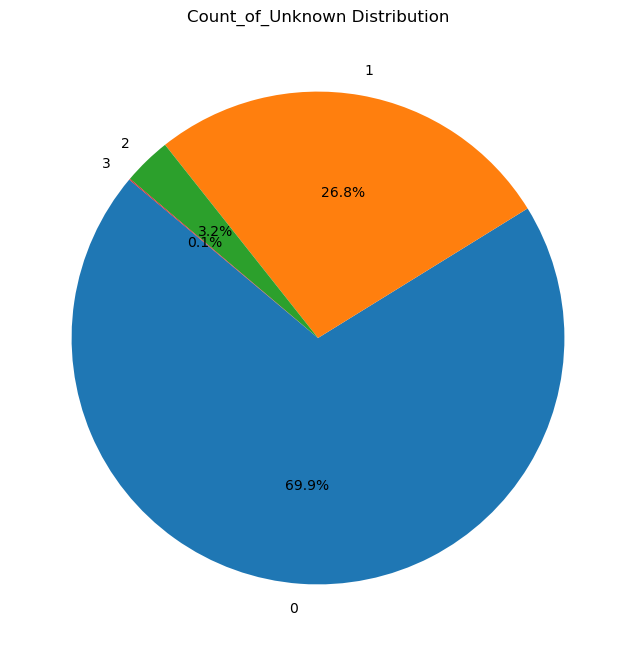

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,At_Least_1_Unknown,Count_of_Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,False,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,False,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,False,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,True,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,False,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,False,0
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,True,1
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,True,1
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,False,0
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,False,0


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the new dataset for bank churn analysis
file_path = 'BankChurners.csv'
bank_data = pd.read_csv(file_path)

#print(bank_data.head(10))

# Drop last 2 columns as stated in docs

bank_data = bank_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

#bank_data['Edu_Known'] = bank_data['Education_Level'].apply(lambda x: False if x == 'Unknown' else True)
#bank_data['Marital_known'] = bank_data['Marital_Status'].apply(lambda x: False if x == 'Unknown' else True)
#bank_data['Income_known'] = bank_data['Income_Category'].apply(lambda x: False if x == 'Unknown' else True)

bank_data['At_Least_1_Unknown'] = bank_data.apply(lambda x: False if x['Education_Level'] != 'Unknown' and x['Marital_Status'] != 'Unknown' and x['Income_Category'] != 'Unknown' else True, axis=1)

bank_data['Count_of_Unknown'] = bank_data.apply(lambda x: 3 if x['Education_Level'] == 'Unknown' and x['Marital_Status'] == 'Unknown' and x['Income_Category'] == 'Unknown' else 2 if (x['Education_Level'] == 'Unknown' and x['Marital_Status'] == 'Unknown') or (x['Education_Level'] == 'Unknown' and x['Income_Category'] == 'Unknown') or (x['Marital_Status'] == 'Unknown' and x['Income_Category'] == 'Unknown') else 1 if x['Education_Level'] == 'Unknown' or x['Marital_Status'] == 'Unknown' or x['Income_Category'] == 'Unknown' else 0, axis=1)

cols = ['Education_Level','Marital_Status','Income_Category','At_Least_1_Unknown','Count_of_Unknown']
for i in cols:
    value_counts = bank_data[i].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(i+' Distribution')
    plt.show()



# Display the first few rows of the dataframe to confirm it's loaded correctly
#bank_data.head()


bank_data.head(10)

In [46]:
Outlier_rows = bank_data[bank_data['Count_of_Unknown'] > 1]

Outlier_rows.drop('Count_of_Unknown',axis=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,At_Least_1_Unknown
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,True
81,715156383,Existing Customer,44,M,1,Unknown,Unknown,$120K +,Blue,36,...,2,34516.0,1533,32983.0,0.924,1603,29,0.526,0.044,True
94,715550508,Existing Customer,45,F,3,Unknown,Married,Unknown,Blue,28,...,2,2535.0,2440,95.0,1.705,1312,20,1.222,0.963,True
101,713843283,Existing Customer,41,F,3,Unknown,Married,Unknown,Silver,34,...,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059,True
211,710565408,Existing Customer,59,M,0,Unknown,Unknown,$80K - $120K,Silver,40,...,3,34516.0,1359,33157.0,1.327,1033,26,1.364,0.039,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,804670758,Existing Customer,48,F,5,Unknown,Divorced,Unknown,Blue,43,...,2,20974.0,2249,18725.0,0.567,15903,121,0.571,0.107,True
9967,715199808,Existing Customer,39,F,3,Graduate,Unknown,Unknown,Silver,30,...,5,33905.0,2070,31835.0,0.685,15335,99,0.768,0.061,True
10015,708964683,Existing Customer,48,F,4,College,Unknown,Unknown,Blue,36,...,1,3310.0,0,3310.0,0.748,14542,89,0.854,0.000,True
10020,715020933,Attrited Customer,44,F,4,High School,Unknown,Unknown,Blue,34,...,4,15944.0,0,15944.0,0.919,9360,67,0.763,0.000,True


In [47]:

Imputation_Model = bank_data[bank_data['Count_of_Unknown'] == 0]
Imputation_Model = Imputation_Model.drop(['At_Least_1_Unknown','Count_of_Unknown'],axis=1)
#remove all rows with unknown count > 1
Edu_Imputation_Model_X  = Imputation_Model.drop(['Education_Level'],axis=1)
Edu_Imputation_Model_Y = Imputation_Model['Education_Level']



## Findings

Feature with Missing Columns: 
'Education_Level' : 15%
'Marital_Status' : 7.4%
'Income_Category' : 11%

CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
Count_of_Unknown            1.364113
dtype: float64


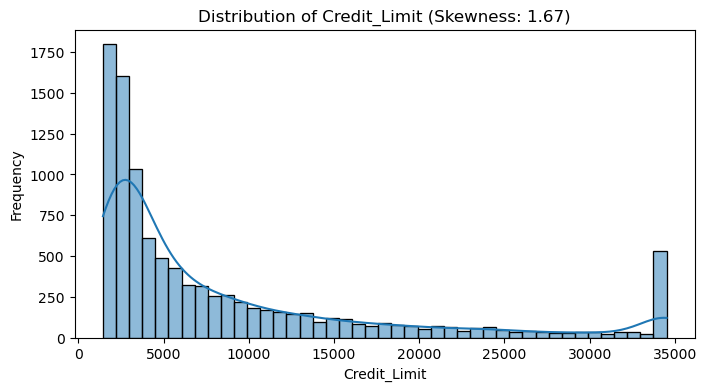

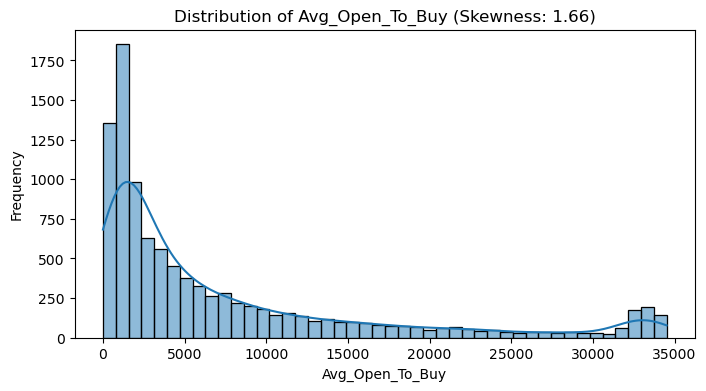

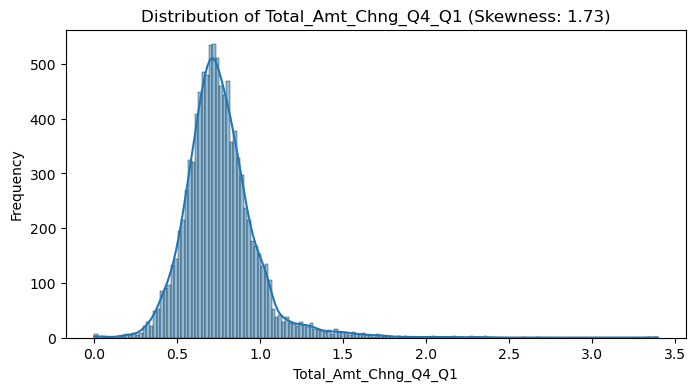

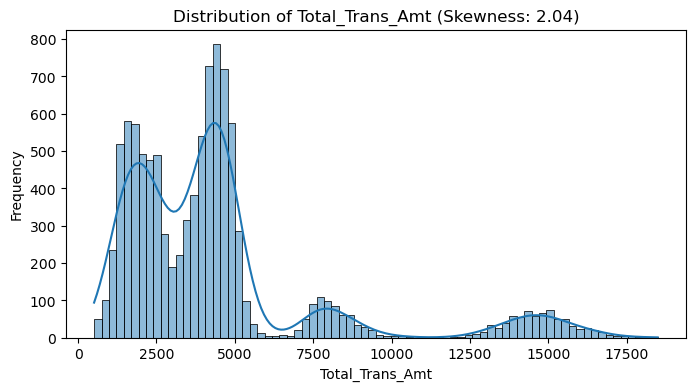

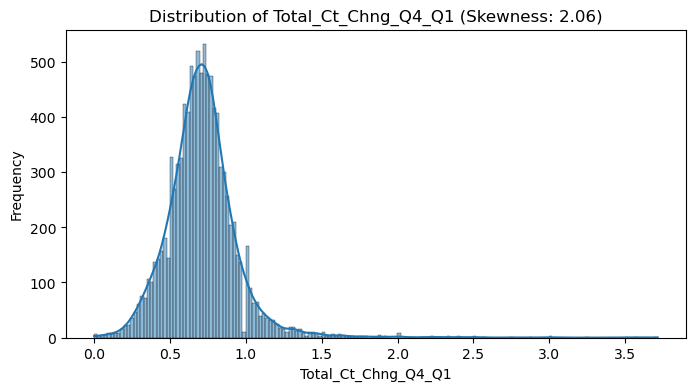

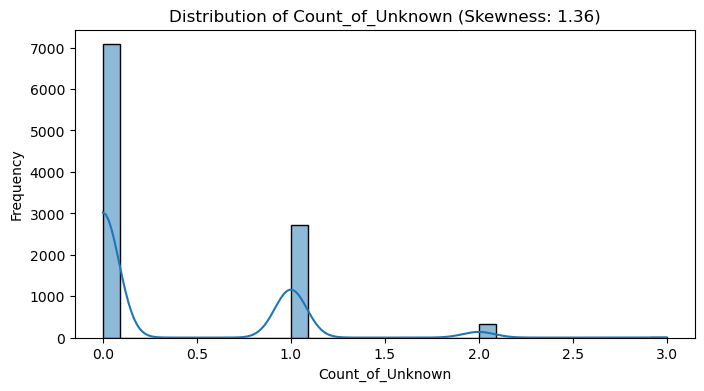

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

bank_data.drop(['Count_of_Unknown','At_Least_1_Unknown'],axis=1)

# First, let's identify numerical columns and calculate skewness for each
numerical_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
skewness = bank_data[numerical_cols].skew()
print(skewness)

# Now, let's find columns with skewness greater than 1 or less than -1 which indicates significant skewness
skewed_cols = skewness[(skewness > 1) | (skewness < -1)].index

# Create distribution plots for skewed columns
for col in skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(bank_data[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Start of Data Preprocessing

# Normalization of Data

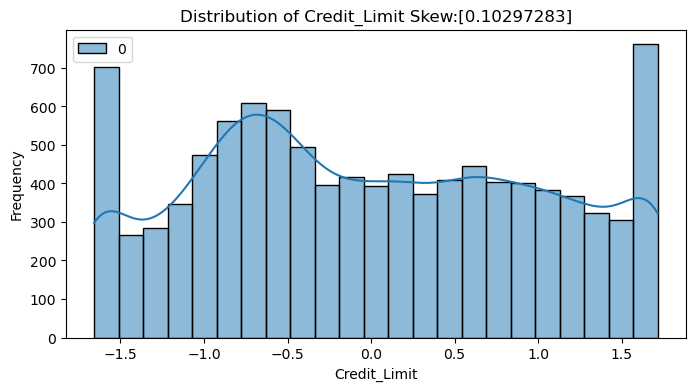

In [49]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox

# Sample DataFrame creation (replace with your actual 'bank_data' DataFrame)
# bank_data = <your_actual_dataframe>

col = 'Credit_Limit'  # Use a string, not a list, for a single column name

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Transform the data
Trans_Amt_Normalization_YJ = pt.fit_transform(bank_data[[col]])  # Double brackets to ensure DataFrame format
# Calculate the skewness of the transformed data
#print(bank_data[col])
#print(Trans_Amt_Normalization)


bank_data[col] = Trans_Amt_Normalization_YJ

transformation_list = [Trans_Amt_Normalization_YJ]

# Plotting
for i in transformation_list:
    transformed_skewness = skew(i)
    plt.figure(figsize=(8, 4))
    sns.histplot(i, kde=True)
    plt.title(f'Distribution of {col} Skew:{skew(i)}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

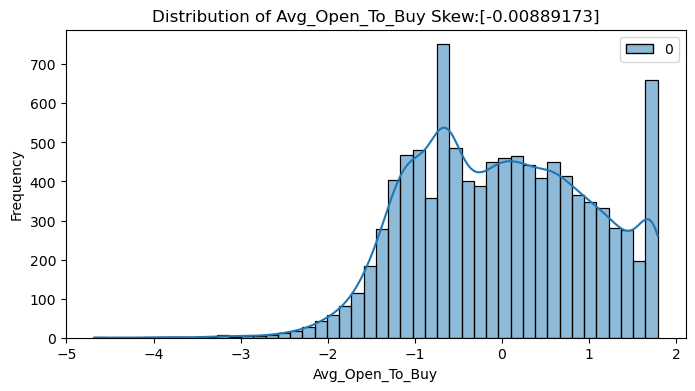

In [50]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox

# Sample DataFrame creation (replace with your actual 'bank_data' DataFrame)
# bank_data = <your_actual_dataframe>

col = 'Avg_Open_To_Buy'  # Use a string, not a list, for a single column name

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Transform the data
Trans_Amt_Normalization_YJ = pt.fit_transform(bank_data[[col]])  # Double brackets to ensure DataFrame format
# Calculate the skewness of the transformed data
#print(bank_data[col])
#print(Trans_Amt_Normalization)


bank_data[col] = Trans_Amt_Normalization_YJ

transformation_list = [Trans_Amt_Normalization_YJ]

# Plotting
for i in transformation_list:
    transformed_skewness = skew(i)
    plt.figure(figsize=(8, 4))
    sns.histplot(i, kde=True)
    plt.title(f'Distribution of {col} Skew:{skew(i)}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

0.00291867447506916
0.0029368299664204824


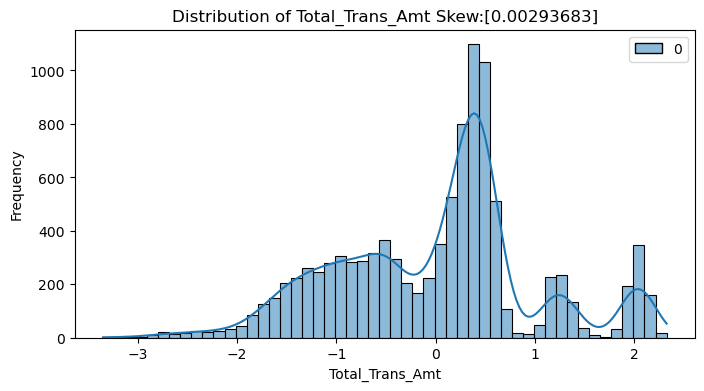

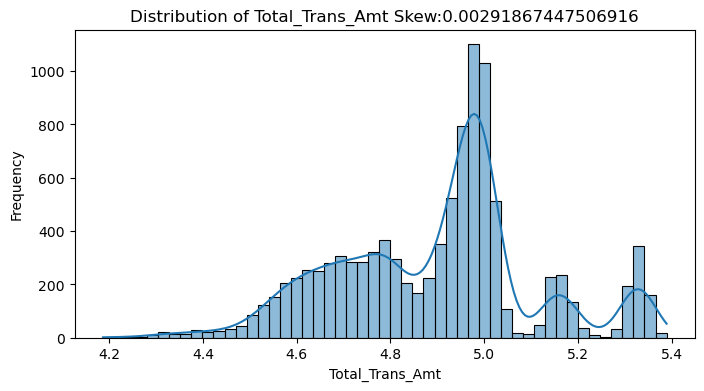

In [51]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox

# Sample DataFrame creation (replace with your actual 'bank_data' DataFrame)
# bank_data = <your_actual_dataframe>

col = 'Total_Trans_Amt'  # Use a string, not a list, for a single column name

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Transform the data
Trans_Amt_Normalization_YJ = pt.fit_transform(bank_data[[col]])  # Double brackets to ensure DataFrame format

Trans_Amt_Normalization_Box_Cox, _ = boxcox(bank_data[col])
print(skew(Trans_Amt_Normalization_Box_Cox))
print(skew(Trans_Amt_Normalization_YJ)[0])
# Calculate the skewness of the transformed data
#print(bank_data[col])
#print(Trans_Amt_Normalization)

bank_data[col] = Trans_Amt_Normalization_YJ


transformation_list = [Trans_Amt_Normalization_YJ,Trans_Amt_Normalization_Box_Cox]

# Plotting
for i in transformation_list:
    transformed_skewness = skew(i)
    plt.figure(figsize=(8, 4))
    sns.histplot(i, kde=True)
    plt.title(f'Distribution of {col} Skew:{skew(i)}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

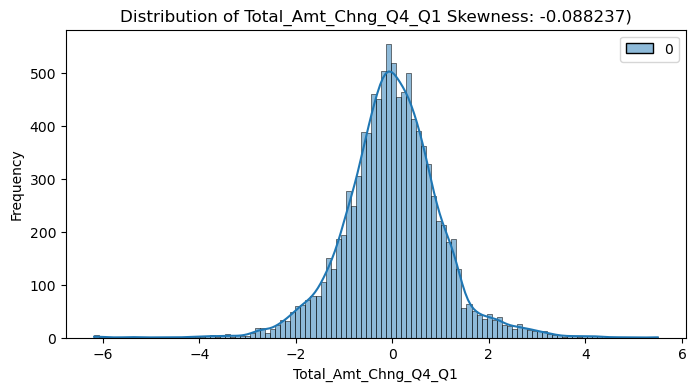

In [52]:
col = 'Total_Amt_Chng_Q4_Q1'  # Use a string, not a list, for a single column name

# Transform the data
data = bank_data[[col]]
#Trans_Ct_Change_Normalization = np.where(data<=0, np.nan,data)  # Double brackets to ensure DataFrame format
#Trans_Ct_Change_Normalization = np.sqrt(Trans_Ct_Change_Normalization)  # Double brackets to ensure DataFrame format

Trans_Ct_Change_Normalization = pt.fit_transform(data)

# Calculate the skewness of the transformed data
transformed_skewness = skew(Trans_Ct_Change_Normalization)
transformed_skewness_value = transformed_skewness[0]

bank_data[col] = Trans_Ct_Change_Normalization


# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(Trans_Ct_Change_Normalization, kde=True)
plt.title(f'Distribution of {col} Skewness: {transformed_skewness_value:.6f})')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()


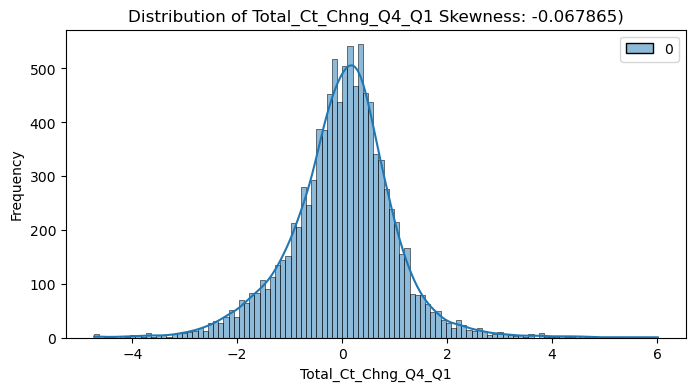

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,At_Least_1_Unknown,Count_of_Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.962782,777,0.930320,2.259377,-1.820680,42,3.016295,0.061,False,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.566512,864,0.554222,2.803534,-1.605685,33,6.011005,0.105,False,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,-0.416953,0,-0.041640,4.654269,-0.953314,20,4.359489,0.000,False,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,-0.456520,2517,-1.128002,2.454134,-1.778915,20,4.359489,0.760,True,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,-0.028788,0,0.205257,4.056715,-2.440781,28,4.612643,0.000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,-0.221957,1851,-0.392083,-0.172752,2.106055,117,0.713993,0.462,False,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,-0.142837,2186,-0.413694,0.323340,1.364659,69,-0.027784,0.511,True,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.125939,0,0.311183,0.392583,1.579991,60,0.557466,0.000,False,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.099350,0,0.292647,-1.133495,1.306176,62,0.148673,0.000,True,1


In [53]:
col = 'Total_Ct_Chng_Q4_Q1'  # Use a string, not a list, for a single column name

# Transform the data
data = bank_data[[col]]
#Trans_Ct_Change_Normalization = np.where(data<=0, np.nan,data)  # Double brackets to ensure DataFrame format
#Trans_Ct_Change_Normalization = np.sqrt(Trans_Ct_Change_Normalization)  # Double brackets to ensure DataFrame format

Trans_Ct_Change_Normalization = pt.fit_transform(data)

# Calculate the skewness of the transformed data
transformed_skewness = skew(Trans_Ct_Change_Normalization)
transformed_skewness_value = transformed_skewness[0]

bank_data[col] = Trans_Ct_Change_Normalization

# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(Trans_Ct_Change_Normalization, kde=True)
plt.title(f'Distribution of {col} Skewness: {transformed_skewness_value:.6f})')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

bank_data

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


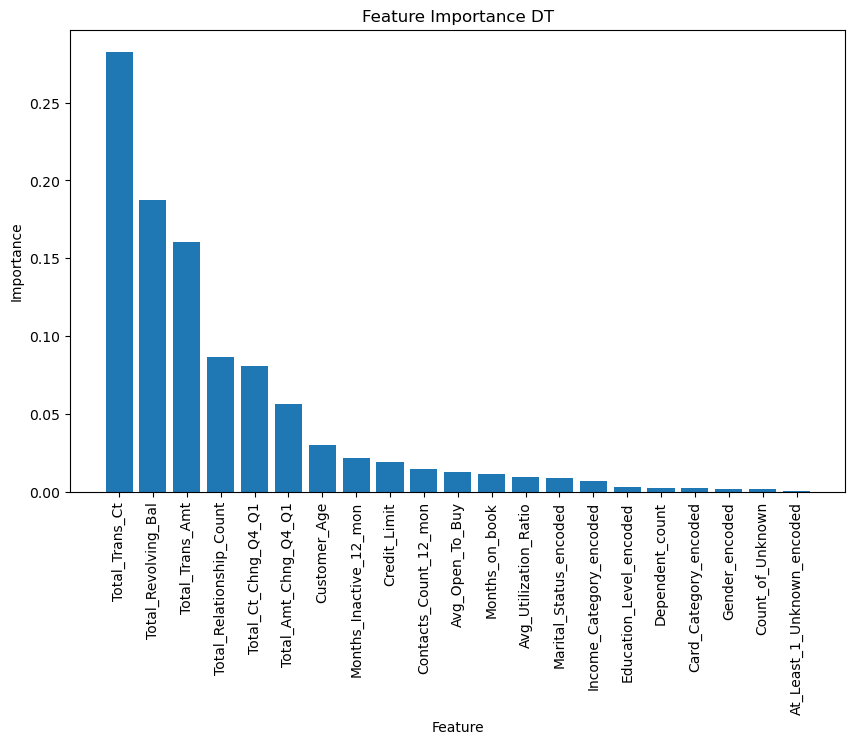

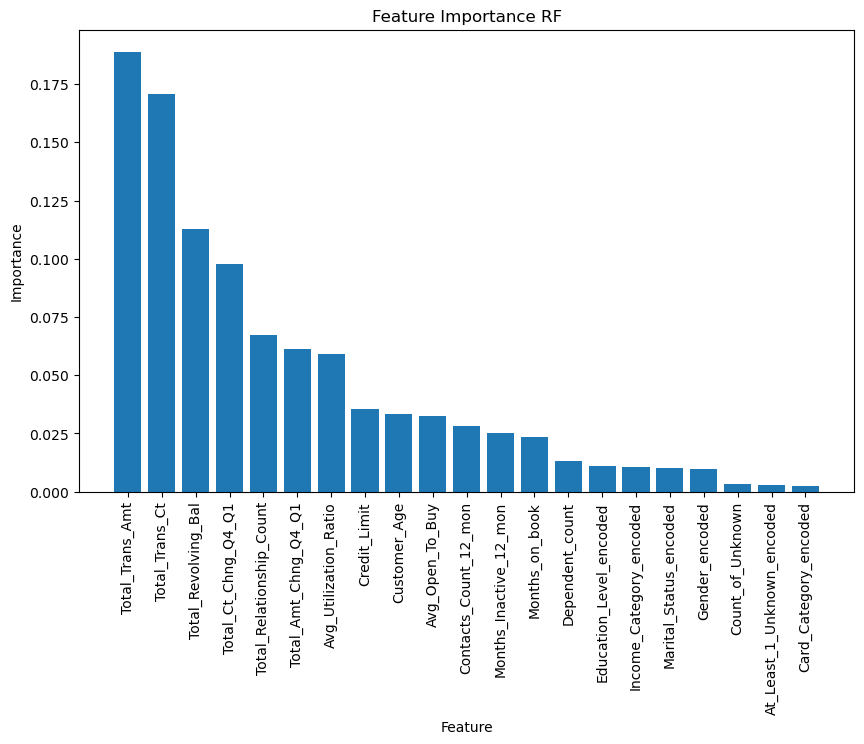

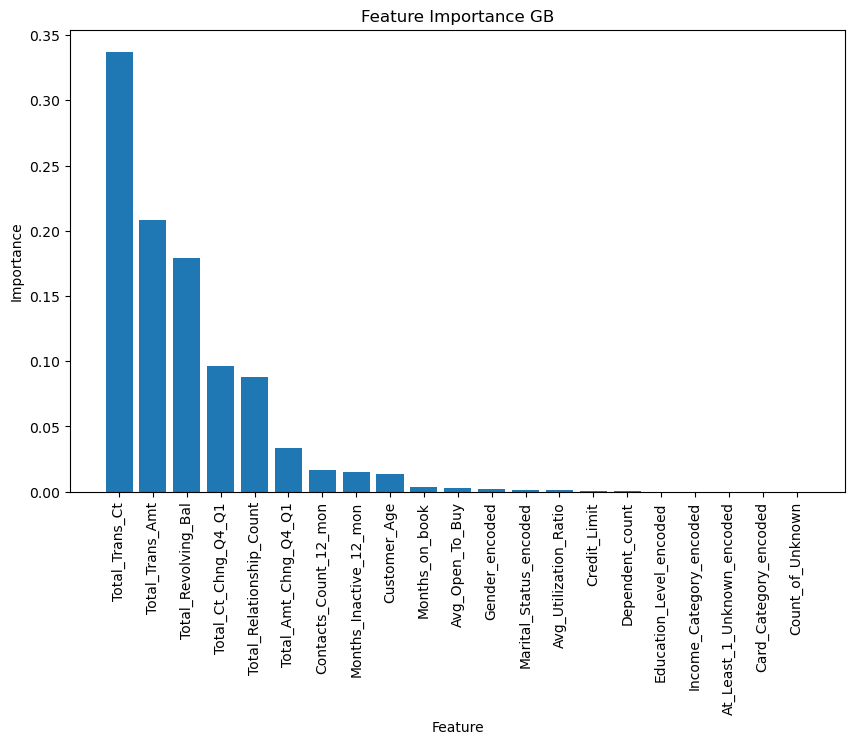

In [55]:

if 'Attrition_Flag_encoded' in bank_data.columns:
    bank_data = bank_data.drop(['Attrition_Flag_encoded'],axis=1)

y = bank_data['Attrition_Flag'].apply(lambda x: 1 if "Attrited Customer" == x else 0)

bank_data_encoded = pd.DataFrame()

label_encoder = LabelEncoder()
for col_name in bank_data:
    if bank_data[col_name].dtype != 'int64' and bank_data[col_name].dtype != 'float64':
        bank_data[col_name+"_encoded"] = label_encoder.fit_transform(bank_data[col_name])
        bank_data_encoded[col_name+"_encoded"] = bank_data[col_name+"_encoded"]
    else:
        bank_data_encoded[col_name] = bank_data[col_name]

X = bank_data_encoded.drop(['Attrition_Flag_encoded','CLIENTNUM'],axis=1)
#y = bank_data_encoded['Attrition_Flag_encoded']


feature_names = list(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=136)

# Create a DT object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance DT")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=136)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance RF")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=136)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance GB")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()




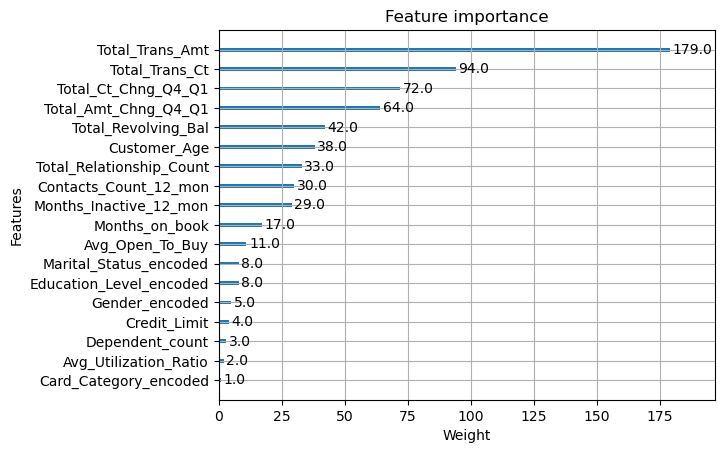

In [56]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=136)
xgb_classifier.fit(X_train, y_train)

xgb.plot_importance(xgb_classifier, importance_type='weight', xlabel='Weight')
plt.show()

#Selecting the top 10 features
top_10_features = sorted_feature_names[:20]
x_train_top_10 = X_train[top_10_features]
x_test_top_10 = X_test[top_10_features]


In [68]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
#from scipy.stats import randint, uniform

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}


# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier(random_state=136)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, 
                                n_iter=100, scoring='accuracy', cv=5, verbose=1, random_state=136)
# Fit the grid search to the data
random_search.fit(x_train_top_10, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)
# print("Best estimator found: ", random_search.best_estimator_)
# Get the best model


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 1.5, 'colsample_bytree': 0.8}
Best accuracy found:  0.9711143860290476
